In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy.io as sp
# from scipy.stats import expon, poisson, norm
# import statistics
# import pandas as pd
from math import exp, sqrt
# import copy
# import random

In [2]:
plt.style.use('ggplot')
fig_width = 8 # width in inches
fig_height = 6 # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True

sns.set(style = 'whitegrid',context = 'notebook', 
        palette = 'dark', font_scale = 1.5)

# PROBLEM 2 Circuit with mutual inhibition

We now consider a circuit of two neurons that are coupled by mutual inhibition. For the firing
rates of these two neurons, x1 and x2, we assume the differential equations

$x_1'(t) = −x_1(t) + f(wx_2(t) + I)$

$x_2'(t) = −x_2(t) + f(wx_1(t) + I)$

where f(·) is defined as before and the inhibitory synaptic weights are given by w = −0.1. The
external inputs are assumed to be excitatory, I = 5

## (a)
Plot the null-isoclines (“nullclines”) of the system, i.e., the line for which $x˙_1(t) = 0$ and the line for which $x˙_2(t) = 0$. What do the crossing points of these lines indicate?


$  x_1 = 50(1 + tanh(-0.1 \cdot x_2 + 5))\\
x_2 = 50(1 + tanh(-0.1 \cdot x_1 + 5))
$ 


In [4]:
def activation(s):
  return 50*(1 + np.tanh(s)) 

activation = np.vectorize(activation)

In [39]:
def two_neurons(x1, w, i):
    return activation(w * x1+ i) 

two_neurons = np.vectorize(two_neurons)

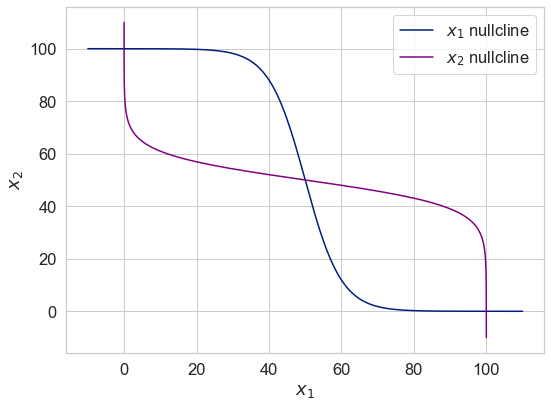

In [210]:
w = -0.1
I = 5
xs = np.linspace(-10, 110, 200)

plt.plot(xs,two_neurons(xs, w, I))
plt.plot(two_neurons(xs, w, I), xs, color = 'purple')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend([r'$x_1$ nullcline',r'$x_2$ nullcline' ], loc = 'best')
plt.savefig('fig1_p2_report4')

## (b)
(b) Simulate the system (time step dt = 0.1)! Choose an initial condition for x1(0) and x2(0) and
plot the evolution of the firing rates of the two neurons into the same plot as the nullclines from (a).
What happens for different initial conditions?

In [131]:
def two_neurons_euler(x1_0,x2_0,w, I, delta_t, T):
    x1 = np.zeros(int(T/delta_t))
    x2 = np.zeros(int(T/delta_t))
    x1[0] = x1_0
    x2[0] = x2_0
    
    for i in range(len(x1)-1):
        x1[i + 1] = (1-delta_t)*x1[i] + activation(w * x2[i] + I) * delta_t
        x2[i + 1] = (1-delta_t)*x2[i] + activation(w * x1[i] + I) * delta_t
            
    return x1, x2

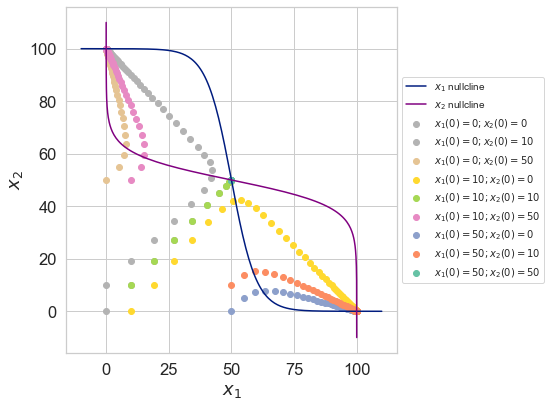

In [209]:
w = -0.1
I = 5
delta_t = 0.1
T = 50
x1_0 = [0,10, 50]
x2_0 = [0,10, 50]

colors = plt.cm.Set2(np.linspace(1,0,9))
labels = [r'$x_1$ nullcline',r'$x_2$ nullcline',]

counter = 0
for i in x1_0:
    for j in x2_0:
        x1, x2 = two_neurons_euler(i,j, w, I, delta_t, T)
        
        labels.append(r'$x_1(0) = {}; x_2(0) = {}$'.format(i, j))
        plt.scatter(x1, x2, color = colors[counter] )
        counter +=1
    
plt.plot(xs,two_neurons(xs, w, I))
plt.plot(two_neurons(xs, w, I), xs, color = 'purple')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(labels , loc='center left', bbox_to_anchor=(1, 0.5 ), fontsize = 10)
plt.savefig('fig2_p2_report4')

## (c)
So far we have treated each neuron separately, i.e., each neuron got its own equation. When
we use matrix-vector notation, we can summarize these two equations into one:

We here follow the convention in the literature by which vectors are denoted by bold-faced letters, and
matrices by capitalized letters. Reprogram your program from (b) using Scipy/MATLAB/Numpy’s
intrinsic ability to compute with matrices and vectors! (Note that x and I are column-vectors!

In [148]:
def two_neurons_matrix(X_0, W, I, delta_t, T):
    X = np.zeros((int(T/delta_t),2))
    X[0] = X_0
    
    for i in range(int(T/delta_t)-1):
        X[i + 1] = (1-delta_t)*X[i] + activation(W.dot(X[i]) + I) * delta_t

            
    return X

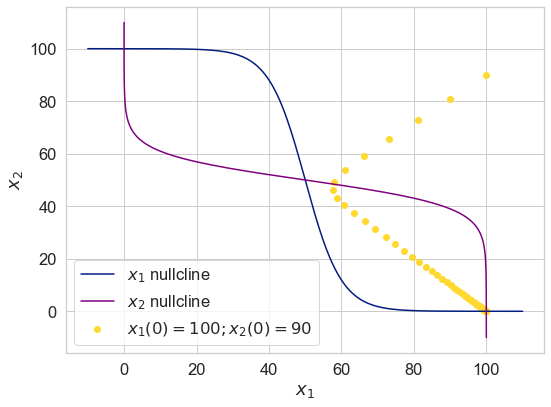

In [208]:
W = np.array([[0, -0.1],
              [-0.1, 0]])
I_matrix = np.array([5,5])
delta_t = 0.1
T = 50
X_0 = (100,90)

X = two_neurons_matrix(X_0, W, I_matrix, delta_t, T)

plt.scatter(X[:,0], X[:,1], color = colors[3])

plt.plot(xs,two_neurons(xs, w, I))
plt.plot(two_neurons(xs, w, I), xs, color = 'purple')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
labels = [r'$x_1$ nullcline',r'$x_2$ nullcline', r'$x_1(0) = {}; x_2(0) = {}$'.format(X_0[0], X_0[1])]
plt.legend(labels , loc='best')
plt.savefig('fig3_p2_report4')

## (d) Advanced
Plotting the vector field of derivatives In addition to the nullclines, use the
Scipy/MATLAB/matplotlib function quiver to plot the vector field of derivatives!


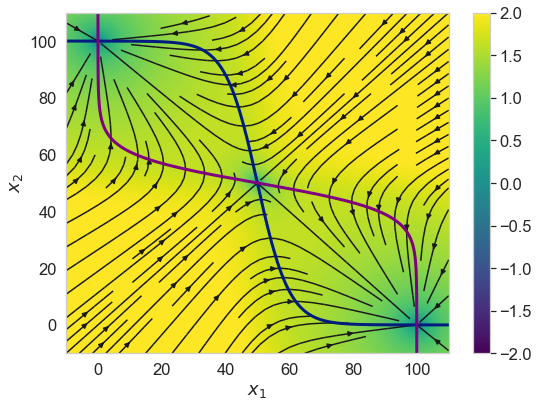

In [207]:
x1s = np.linspace(-10, 110, 200)
x2s = np.linspace(-10, 110, 200)
X1, X2 = np.meshgrid(x1s,x2s)
#%%
U = np.zeros_like(X1)
V = np.zeros_like(X1)

w = -0.1
I = 5

for ix1, x1 in enumerate(x1s):
    for ix2, x2 in enumerate(x2s):
        U[ix1, ix2] = -x1 + activation(w * x2 + I) 
        V[ix1, ix2] = -x2 + activation(w * x1 + I) 
E = np.sqrt(U**2+V**2)

plt.set_cmap('viridis')
#%%
plt.pcolor(x1s, x2s, np.log10(E).T, vmin = -2, vmax = 2.)
plt.plot(xs,two_neurons(xs, w, I), linewidth=3)
plt.plot(two_neurons(xs, w, I), xs, linewidth=3, color = 'purple')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.colorbar()
plt.streamplot(x1s, x2s, U.T, V.T, color='k')
plt.xlim([np.min(x1s), np.max(x1s)])
plt.ylim([np.min(x2s), np.max(x2s)])
plt.savefig('fig4_p2_report4')